In [91]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload a file from your local system



Saving Airline_Delay_Cause.csv to Airline_Delay_Cause (2).csv


In [92]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Airline_Delay_Cause.csv')

# Show the first few rows to understand its structure
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1916 non-null   int64  
 1   month                1916 non-null   int64  
 2   carrier              1916 non-null   object 
 3   carrier_name         1916 non-null   object 
 4   airport              1916 non-null   object 
 5   airport_name         1916 non-null   object 
 6   arr_flights          1916 non-null   float64
 7   arr_del15            1916 non-null   float64
 8   carrier_ct           1916 non-null   float64
 9   weather_ct           1916 non-null   float64
 10  nas_ct               1916 non-null   float64
 11  security_ct          1916 non-null   float64
 12  late_aircraft_ct     1916 non-null   float64
 13  arr_cancelled        1916 non-null   float64
 14  arr_diverted         1916 non-null   float64
 15  arr_delay            1916 non-null   f

(   year  month carrier   carrier_name airport  \
 0  2025      1      G4  Allegiant Air     ELM   
 1  2025      1      G4  Allegiant Air     ELP   
 2  2025      1      G4  Allegiant Air     EUG   
 3  2025      1      G4  Allegiant Air     EVV   
 4  2025      1      G4  Allegiant Air     EWR   
 
                                   airport_name  arr_flights  arr_del15  \
 0  Elmira/Corning, NY: Elmira/Corning Regional         30.0        0.0   
 1           El Paso, TX: El Paso International          2.0        0.0   
 2               Eugene, OR: Mahlon Sweet Field         28.0        8.0   
 3          Evansville, IN: Evansville Regional         18.0        1.0   
 4     Newark, NJ: Newark Liberty International         31.0        5.0   
 
    carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
 0        0.00         0.0  ...          0.0              0.00            0.0   
 1        0.00         0.0  ...          0.0              0.00            0.0   
 2 

In [93]:
# Check for unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
print(f"Unnamed columns: {unnamed_columns}")

# Check for null values
null_values = df.isnull().sum()
print(f"Null values in each column:\n{null_values}")


Unnamed columns: []
Null values in each column:
year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [94]:
# Convert numeric columns to appropriate types if needed
numeric_columns = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
                   'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled',
                   'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay',
                   'nas_delay', 'security_delay', 'late_aircraft_delay']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Verify the data types
print(f"Data types after conversion:\n{df.dtypes}")


Data types after conversion:
year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [95]:
# Save the cleaned dataset
df.to_csv('cleaned_airline_delay_data.csv', index=False)


# **EDA**

In [96]:
# Descriptive statistics for numeric columns
print(df.describe())

# Check for unique values in categorical columns
print(df['carrier'].unique())
print(df['carrier_name'].unique())
print(df['airport'].unique())
print(df['airport_name'].unique())


         year   month   arr_flights    arr_del15   carrier_ct   weather_ct  \
count  1916.0  1916.0   1916.000000  1916.000000  1916.000000  1916.000000   
mean   2025.0     1.0    312.637265    57.205115    18.786399     2.758027   
std       0.0     0.0    899.674648   159.885083    49.430566     9.059123   
min    2025.0     1.0      1.000000     0.000000     0.000000     0.000000   
25%    2025.0     1.0     38.000000     7.000000     2.007500     0.000000   
50%    2025.0     1.0     84.000000    17.000000     6.080000     0.840000   
75%    2025.0     1.0    208.250000    42.000000    15.310000     2.312500   
max    2025.0     1.0  17473.000000  3161.000000   951.700000   159.710000   

            nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  1916.000000  1916.000000       1916.000000    1916.000000   
mean     17.149859     0.142860         18.367907       9.780793   
std      53.127094     0.716634         55.719604      38.641365   
min       0.000000     0.

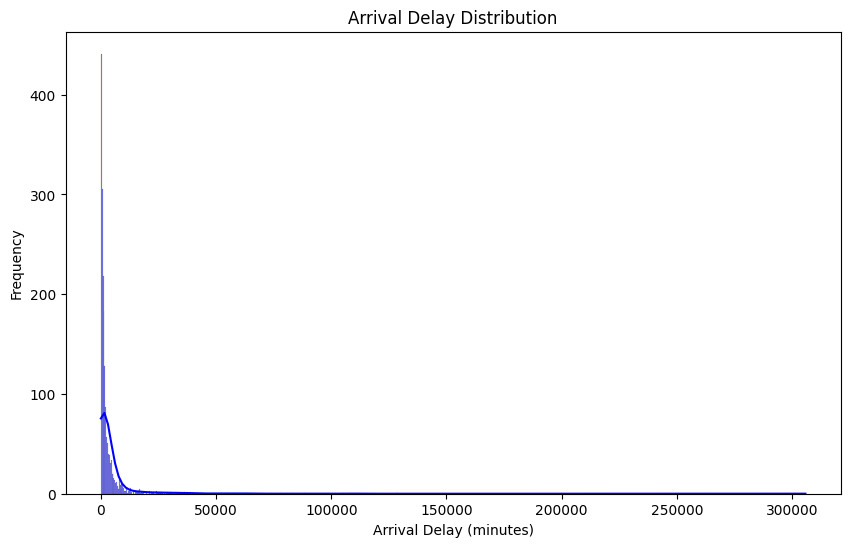

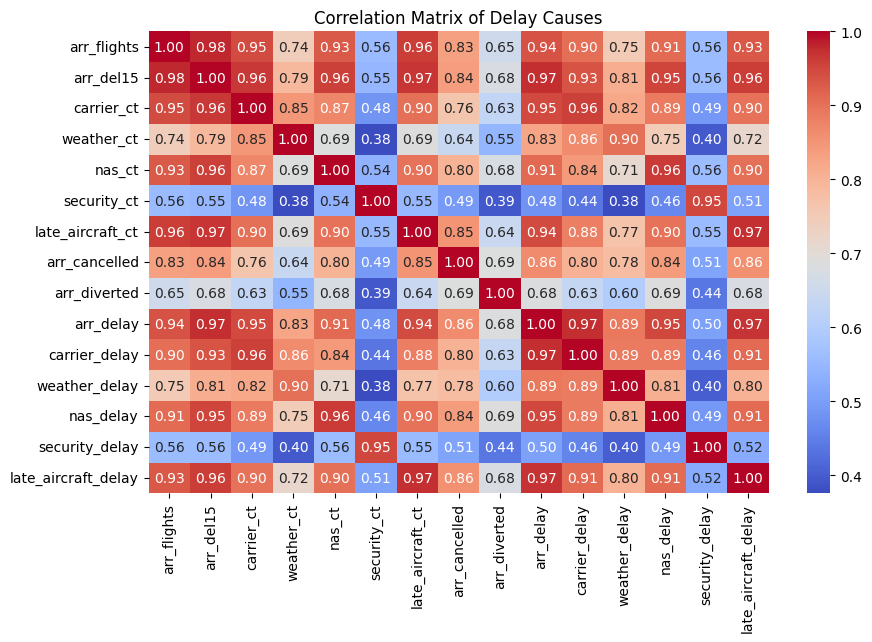

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of delays
plt.figure(figsize=(10,6))
sns.histplot(df['arr_delay'], kde=True, color='blue')
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation between different delay causes
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Delay Causes')
plt.show()


In [98]:
import pandas as pd

# Assuming df is already loaded

# Remove duplicates (already done before)
df_no_duplicates = df.drop_duplicates()

# Check for any outliers if needed (manually or use IQR instead of Z-score)
# Here's how to calculate IQR and filter out outliers:
Q1 = df_no_duplicates[numeric_columns].quantile(0.25)
Q3 = df_no_duplicates[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
df_no_outliers = df_no_duplicates[~((df_no_duplicates[numeric_columns] < lower_bound) | (df_no_duplicates[numeric_columns] > upper_bound)).any(axis=1)]

# Check the first few rows of the cleaned data
print(df_no_outliers.head())


   year  month carrier   carrier_name airport  \
0  2025      1      G4  Allegiant Air     ELM   
1  2025      1      G4  Allegiant Air     ELP   
2  2025      1      G4  Allegiant Air     EUG   
4  2025      1      G4  Allegiant Air     EWR   
5  2025      1      G4  Allegiant Air     EYW   

                                  airport_name  arr_flights  arr_del15  \
0  Elmira/Corning, NY: Elmira/Corning Regional         30.0        0.0   
1           El Paso, TX: El Paso International          2.0        0.0   
2               Eugene, OR: Mahlon Sweet Field         28.0        8.0   
4     Newark, NJ: Newark Liberty International         31.0        5.0   
5         Key West, FL: Key West International         73.0        8.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        0.00         0.0  ...          0.0              0.00            0.0   
1        0.00         0.0  ...          0.0              0.00            0.0   
2        3.74       

In [99]:
# Step 1: Create the 'total_delay' feature
df['total_delay'] = df['carrier_delay'] + df['weather_delay'] + df['nas_delay'] + df['security_delay'] + df['late_aircraft_delay']

# Step 2: Create the 'cancellation_rate' feature
df['cancellation_rate'] = df['arr_cancelled'] / df['arr_flights']

# Display the updated dataframe with the new features
df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay,cancellation_rate
0,2025,1,G4,Allegiant Air,ELM,"Elmira/Corning, NY: Elmira/Corning Regional",30.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2025,1,G4,Allegiant Air,ELP,"El Paso, TX: El Paso International",2.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,2025,1,G4,Allegiant Air,EUG,"Eugene, OR: Mahlon Sweet Field",28.0,8.0,3.74,0.0,...,2.0,0.0,409.0,236.0,0.0,70.0,0.0,103.0,409.0,0.071429
3,2025,1,G4,Allegiant Air,EVV,"Evansville, IN: Evansville Regional",18.0,1.0,0.00,1.0,...,0.0,0.0,1075.0,0.0,1075.0,0.0,0.0,0.0,1075.0,0.000000
4,2025,1,G4,Allegiant Air,EWR,"Newark, NJ: Newark Liberty International",31.0,5.0,2.17,0.0,...,1.0,0.0,446.0,336.0,0.0,110.0,0.0,0.0,446.0,0.032258


In [100]:
from sklearn.preprocessing import LabelEncoder

# Step 3: Label Encoding for 'carrier' column
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])

# One-Hot Encoding for categorical columns (carrier_name, airport, airport_name)
df = pd.get_dummies(df, columns=['carrier_name', 'airport', 'airport_name'], drop_first=True)

# Step 4: Drop any unnecessary columns if needed
# For now, we are dropping the original 'carrier_name', 'airport', and 'airport_name' columns.
# Since they have already been one-hot encoded, the above code handles the conversion.

# Display the updated dataframe
df.head()


,year,month,carrier,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,...,"airport_name_White Plains, NY: Westchester County","airport_name_Wichita Falls, TX: Sheppard AFB/Wichita Falls Municipal","airport_name_Wichita, KS: Wichita Dwight D Eisenhower National","airport_name_Williston, ND: Williston Basin International","airport_name_Wilmington, NC: Wilmington International","airport_name_Worcester, MA: Worcester Regional","airport_name_Wrangell, AK: Wrangell Airport","airport_name_Yakima, WA: Yakima Air Terminal/McAllister Field","airport_name_Yakutat, AK: Yakutat Airport","airport_name_Yuma, AZ: Yuma MCAS/Yuma International"
0,2025,1,7,30.0,0.0,0.00,0.0,0.00,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
1,2025,1,7,2.0,0.0,0.00,0.0,0.00,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
2,2025,1,7,28.0,8.0,3.74,0.0,1.60,0.0,2.66,...,False,False,False,False,False,False,False,False,False,False
3,2025,1,7,18.0,1.0,0.00,1.0,0.00,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
4,2025,1,7,31.0,5.0,2.17,0.0,2.83,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False


In [101]:
# Step 5: Split the data into features (X) and target (y)
X = df.drop('arr_delay', axis=1)  # Drop the target column from the features
y = df['arr_delay']  # Set the target variable

# Optionally, you can perform additional preprocessing or scaling on X here if necessary.


In [102]:
from sklearn.model_selection import train_test_split

# Step 6: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1532, 741), (384, 741), (1532,), (384,))

In [103]:
from sklearn.ensemble import RandomForestRegressor

# Step 7: Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 773945.5104182288
R-squared: 0.9920914859634381


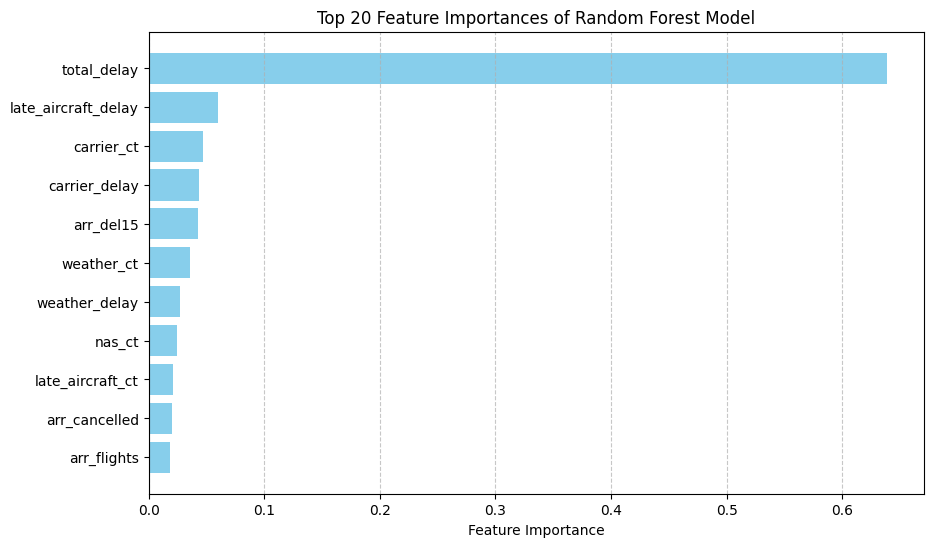

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 9: Feature Importance
feature_importances = model.feature_importances_
features = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for better sorting and visualization
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Filter out features with very low importance (below a certain threshold)
threshold = 0.01  # You can adjust this threshold value
feature_df = feature_df[feature_df['Importance'] > threshold]

# Sort by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Limit to top N features (optional)
top_n = 20  # You can adjust this number
feature_df_top_n = feature_df.head(top_n)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df_top_n['Feature'], feature_df_top_n['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances of Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid for better clarity
plt.show()


In [105]:
param_grid = {
    'n_estimators': [100, 200],        # Reduced number of trees
    'max_depth': [None, 10],            # Reduce max_depth options
    'min_samples_split': [2, 5],        # Reduced values for min_samples_split
    'min_samples_leaf': [1, 2],         # Reduced values for min_samples_leaf
    'max_features': ['sqrt', 'log2']   # Only testing these two options for max_features
}


In [106]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Setup the randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the random search
random_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best Parameters (Random Search): {random_search.best_params_}")
print(f"Best Cross-Validation Score (Random Search): {random_search.best_score_}")

# Get the best model from random search
best_model_random = random_search.best_estimator_

# Reevaluate with the best model
y_pred_best_random = best_model_random.predict(X_test)

# Calculate and print the evaluation metrics
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
r2_best_random = r2_score(y_test, y_pred_best_random)

print(f"Mean Squared Error (Best Model - Random Search): {mse_best_random}")
print(f"R-squared (Best Model - Random Search): {r2_best_random}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Random Search): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Cross-Validation Score (Random Search): 0.9046746504581289
Mean Squared Error (Best Model - Random Search): 3344770.643684115
R-squared (Best Model - Random Search): 0.9658216693183456


In [113]:
# Combine the actual values and predicted values into a DataFrame for easier analysis
results_df = X_test.copy()
results_df['Actual_Delay'] = y_test
results_df['Predicted_Delay'] = y_pred_best_random

# Optionally, save the results to a CSV file for Tableau or other tools
results_df.to_csv('flight_delay_predictions_random_search.csv', index=False)


In [114]:
import joblib

# Save the best model
joblib.dump(best_model_random, 'best_random_forest_model.joblib')

# Load the saved model later
# loaded_model = joblib.load('best_random_forest_model.joblib')


['best_random_forest_model.joblib']

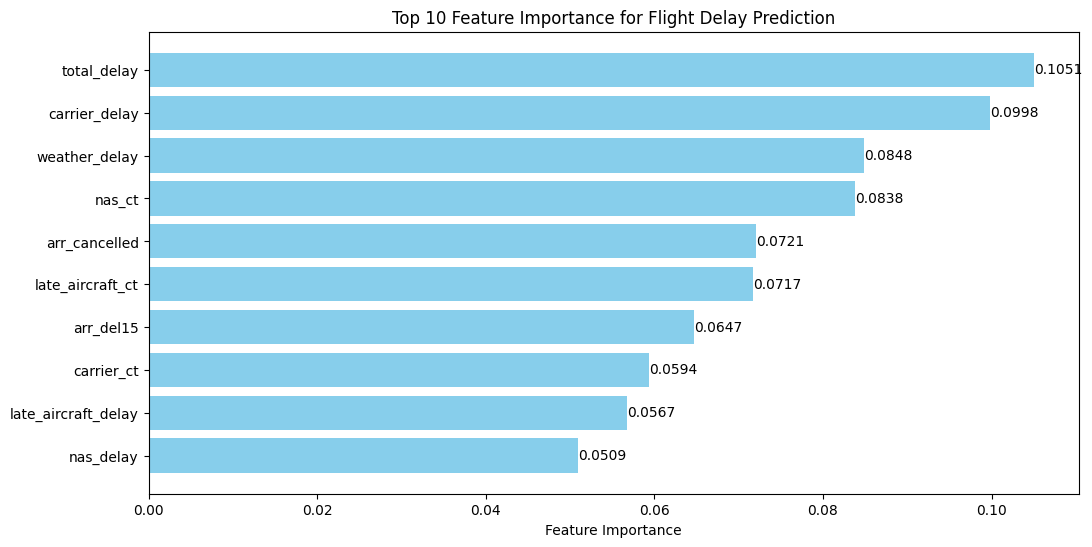

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best model
importances = best_model_random.feature_importances_

# Create a DataFrame for features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top N features for display (for example, top 10)
top_n = 10
top_features = feature_importance_df.head(top_n)

# Create a horizontal bar chart of top features
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance for Flight Delay Prediction')

# Add feature importance values to the bars
for index, value in enumerate(top_features['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center', ha='left', color='black', fontsize=10)

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()



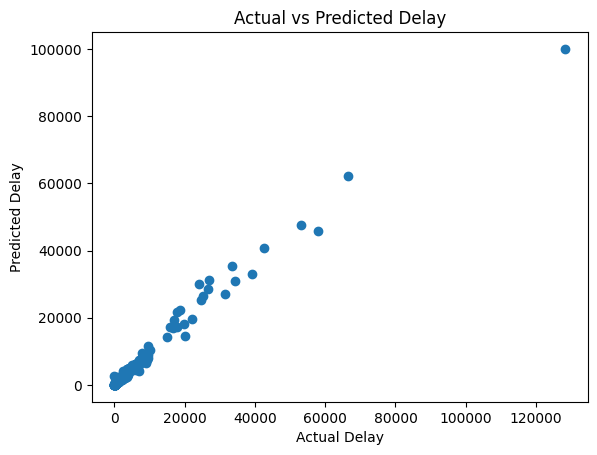

In [116]:
plt.scatter(y_test, y_pred_best_random)
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Actual vs Predicted Delay')
plt.show()


In [118]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicted values
y_pred = best_model_random.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3344770.643684115
R-squared: 0.9658216693183456


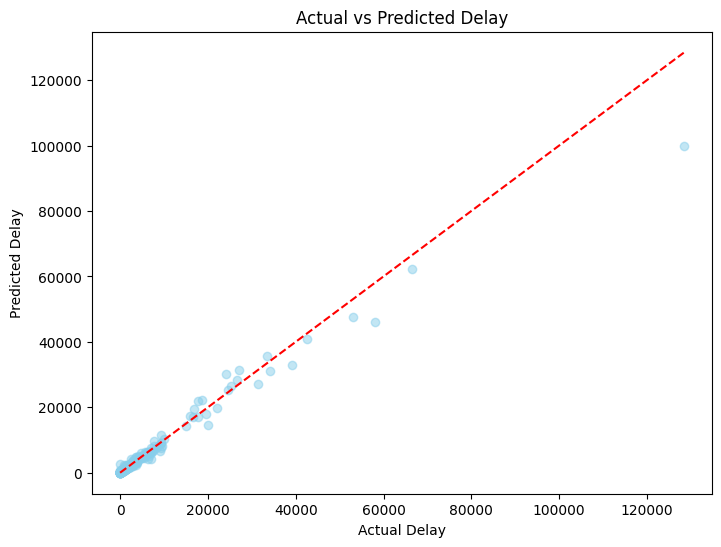

In [119]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Actual vs Predicted Delay')
plt.show()


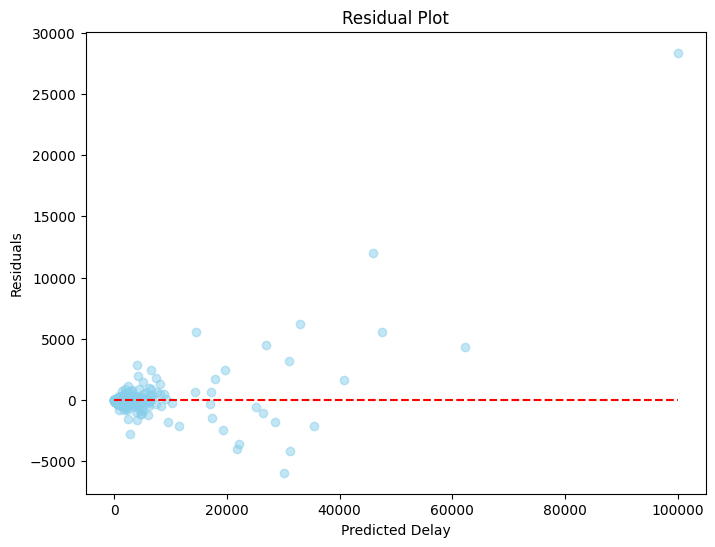

In [120]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='skyblue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.xlabel('Predicted Delay')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [121]:
# Check the number of rows in the current DataFrame
print(f"Number of rows in the dataset: {results_df.shape[0]}")


Number of rows in the dataset: 384


In [122]:
# Check the first few rows
print(results_df.head())

# Check the last few rows
print(results_df.tail())

# Check for any duplicates in the dataset
duplicates = results_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


      year  month  carrier  arr_flights  arr_del15  carrier_ct  weather_ct  \
950   2025      1        1        100.0       27.0        8.47        1.56   
1467  2025      1       15        190.0       57.0        5.82        3.01   
609   2025      1       13        129.0       30.0       18.16        5.00   
495   2025      1       13         68.0       17.0       11.63        1.98   
1322  2025      1        6         29.0       12.0        2.87        0.00   

      nas_ct  security_ct  late_aircraft_ct  ...  \
950     8.60          0.0              8.36  ...   
1467   24.70          0.0             23.48  ...   
609     4.28          0.0              2.55  ...   
495     1.53          0.0              1.86  ...   
1322    3.08          0.0              6.04  ...   

      airport_name_Wichita, KS: Wichita Dwight D Eisenhower National  \
950                                               False                
1467                                              False                
60

In [126]:
print(results_df.columns)


Index(['year', 'month', 'carrier', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       ...
       'airport_name_Tulsa, OK: Tulsa International',
       'airport_name_Valparaiso, FL: Eglin AFB Destin Fort Walton Beach',
       'airport_name_Victoria, TX: Victoria Regional',
       'airport_name_Washington, DC: Ronald Reagan Washington National',
       'airport_name_Washington, DC: Washington Dulles International',
       'airport_name_West Palm Beach/Palm Beach, FL: Palm Beach International',
       'airport_name_White Plains, NY: Westchester County',
       'airport_name_Wichita Falls, TX: Sheppard AFB/Wichita Falls Municipal',
       'Actual_Delay', 'Predicted_Delay'],
      dtype='object', length=407)


In [127]:
# Assuming airport_name_* columns exist but 'airport_name' doesn't
airport_columns = [col for col in results_df.columns if 'airport_name' in col]

# Create a new 'airport_name' column based on which airport columns are True
def get_airport_name(row):
    for col in airport_columns:
        if row[col]:  # If True, return the airport name from the column header
            return col.split('airport_name_')[1]  # Extract the airport name
    return None  # In case no airport is True (if the column is all False)

# Apply the function to create the 'airport_name' column
results_df['airport_name'] = results_df.apply(get_airport_name, axis=1)

# Now drop the individual airport columns and keep 'airport_name'
results_df_cleaned = results_df.drop(columns=airport_columns)

# Save the cleaned dataset
results_df_cleaned.to_csv('cleaned_flight_delay_predictions.csv', index=False)

# Check the number of columns
print(f"Cleaned dataset shape: {results_df_cleaned.shape}")




Cleaned dataset shape: (384, 225)


In [128]:
from google.colab import files

# Download the cleaned dataset
files.download('cleaned_flight_delay_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>